# howmany

The following notebook gives a quick overview of how to use howmany.

In [1]:
# pip install howmany

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [4]:
# pip install sparqlwrapper

In [5]:
# pip install jupyter-black

In [6]:
%load_ext jupyter_black

In [7]:
import os
import sys

module_path = os.path.abspath(os.path.join("../src"))
if module_path not in sys.path:
    sys.path.append(module_path)

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from SPARQLWrapper import JSON, POST, SPARQLWrapper

display(HTML("<style>.container { width:99% !important; }</style>"))

In [8]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 6)})

In [9]:
import howmany
from howmany.utils import (
    float_to_str,
    get_wd_ent_label,
    get_wd_ent_prop_amount,
    get_wd_ent_prop_amount_unit,
)

## Examples

### Get Property Label, Amount and Unit

In [10]:
eiffel_tower_qid = "Q243"
height_pid = "P2048"

eiffel_tower_label = get_wd_ent_label(qid=eiffel_tower_qid)  # , iso="en"
eiffel_tower_height = get_wd_ent_prop_amount(qid=eiffel_tower_qid, pid="P2048")
eiffel_tower_height_unit = get_wd_ent_prop_amount_unit(qid=eiffel_tower_qid, pid="P2048")

In [13]:
print(
    f"The {eiffel_tower_label} is {round(eiffel_tower_height)} {eiffel_tower_height_unit}s tall."
)

The Eiffel Tower is 324 metres tall.


### Soccer Fields in Germany

The conversion for the soccer fields length and width in meters to kilometers for the area of Germany is done for us.

In [ ]:
germany_qid = "Q183"
soccer_field_qid = "Q8524"
area_pid = "P2046"

In [14]:
soccer_fields_in_germany_dict = howmany.compare(
    containers=germany_qid, entities=soccer_field_qid, pid=area_pid  # , iso="en"
)

In [15]:
for k in soccer_fields_in_germany_dict.keys():
    amount = round(soccer_fields_in_germany_dict[k]["amount"], 2)
    print(
        f"You could fit {amount:,} {soccer_fields_in_germany_dict[k]['entity']}es inside {k}."
    )

You could fit 50,453,300.88 association football pitches inside Germany.


### Germanys in a Soccer Field

The unit conversion is again done for us.

In [16]:
germanies_in_soccer_fields_dict = howmany.compare(
    containers=soccer_field_qid, entities=germany_qid, pid=area_pid  # , iso="en"
)

In [17]:
for k in germanies_in_soccer_fields_dict.keys():
    amount = float_to_str(f=round(germanies_in_soccer_fields_dict[k]["amount"], 10))
    print(
        f"You could fit {amount} {germanies_in_soccer_fields_dict[k]['entity']}s inside an {k}."
    )

You could fit 0.0000000198 Germanys inside an association football pitch.


### Soccer Fields in a Predefined Wind Farm Area

In [18]:
giant_new_wind_farm_label = "giant new wind farm"
area_of_giant_new_wind_farm = 50
unit_of_giant_new_wind_farm_area = "square kilometre"

In [19]:
soccer_fields_in_giant_new_wind_farm_dict = howmany.compare(
    containers=giant_new_wind_farm_label,
    container_amounts=area_of_giant_new_wind_farm,
    container_units=unit_of_giant_new_wind_farm_area,
    entities=soccer_field_qid,
    pid=area_pid,
)  # , iso="en"

In [20]:
for k in soccer_fields_in_giant_new_wind_farm_dict.keys():
    amount = round(soccer_fields_in_giant_new_wind_farm_dict[k]["amount"], 2)
    print(
        f"You could fit {amount:,} {soccer_fields_in_giant_new_wind_farm_dict[k]['entity']}es inside the {k}."
    )

You could fit 7,054.67 association football pitches inside the giant new wind farm.


### Area of German States in Saarlands

In [21]:
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.setReturnFormat(JSON)
sparql.setMethod(POST)

In [22]:
all_german_state_qids_query = """
SELECT
    ?state

WHERE {
    # Germany  # contains the administrative territorial entity  # Object
    wd:Q183    wdt:P150                                          ?state.
}
"""

In [24]:
sparql.setQuery(all_german_state_qids_query)
all_german_state_qids_results = sparql.query().convert()

In [25]:
all_german_state_qids = [
    s["state"]["value"].split("http://www.wikidata.org/entity/")[1]
    for s in all_german_state_qids_results["results"]["bindings"]
]

In [26]:
print(len(all_german_state_qids))
print(all_german_state_qids)

16
['Q64', 'Q980', 'Q985', 'Q1055', 'Q1194', 'Q1196', 'Q1197', 'Q1198', 'Q1199', 'Q1200', 'Q1201', 'Q1202', 'Q1205', 'Q1206', 'Q1208', 'Q1209']


In [27]:
saarland_qid = "Q1201"

In [28]:
saarlands_in_german_states_dict = howmany.compare(
    containers=all_german_state_qids, entities=saarland_qid, pid=area_pid  # , iso="en"
)

In [29]:
german_states = list(saarlands_in_german_states_dict.keys())
german_state_areas_in_saarlands = [
    v["amount"] for v in saarlands_in_german_states_dict.values()
]

In [30]:
german_states_desc_saarland_area = pd.Series(
    s
    for _, s in sorted(
        zip(german_state_areas_in_saarlands, german_states), reverse=True
    )
)

In [31]:
# So the label is not too long for plotting below.
german_states_desc_saarland_area = german_states_desc_saarland_area.replace(
    "Mecklenburg-Western Pomerania", "Mecklenburg"
)

In [32]:
german_state_desc_areas_in_saarlands = pd.Series(
    [round(a, 2) for a in sorted(german_state_areas_in_saarlands, reverse=True)]
)

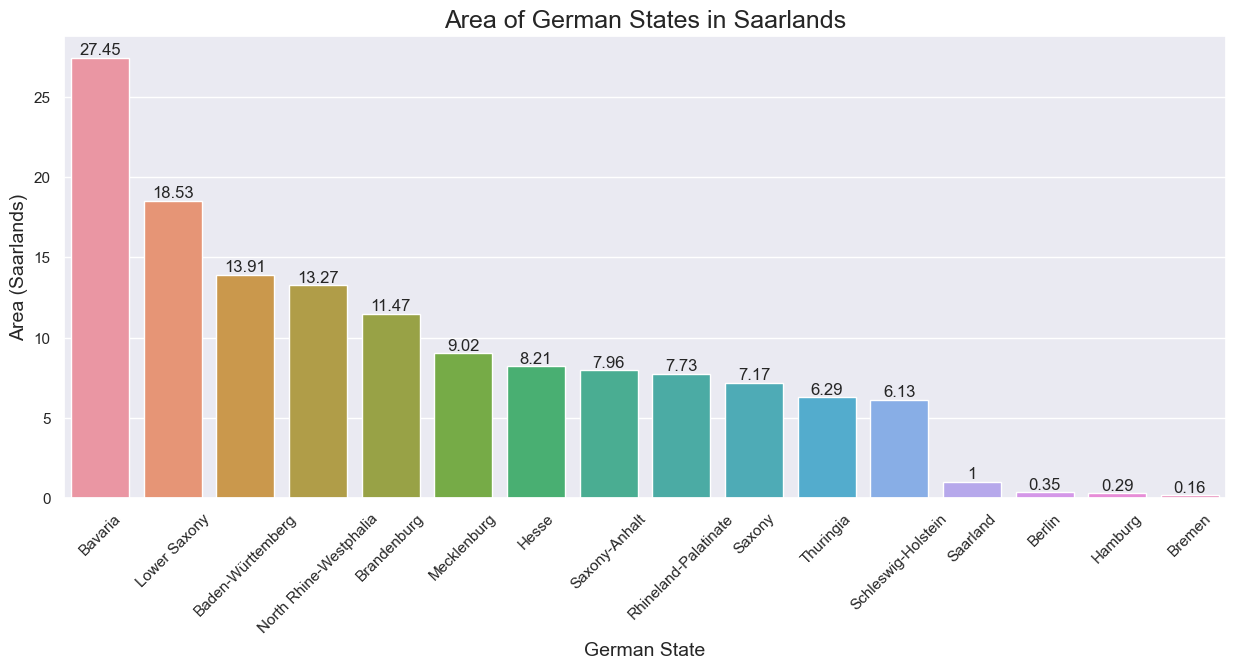

In [33]:
ax = sns.barplot(
    x=german_states_desc_saarland_area, y=german_state_desc_areas_in_saarlands
)
ax.set_title("Area of German States in Saarlands", size=18)
ax.set(xlabel="German State", ylabel="Area (Saarlands)")
ax.bar_label(ax.containers[0])
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.xticks(rotation=45)

plt.savefig(
    "output_images/bar_german_states_by_saarland_area.png", dpi=150, bbox_inches="tight"
)

plt.show()